In [1]:
import requests
from PIL import Image
from io import BytesIO
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import git
import pathlib

In [3]:
def url_to_array(url):
  try:
    if url.startswith('http'):
      r = requests.get(url, headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'})
      im = Image.open(BytesIO(r.content))
    else:
        im = Image.open(url)
    return np.array(im)
  except Exception as e:
    print('invalid image at '+url)

img = url_to_array("https://flowfreesolutions.com/solution-pictures/flow/14mania/flow-14mania-1.png")

In [4]:
img.shape

(568, 320, 3)

In [5]:
def get_color_frequency(image):  
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Flatten the array
    flattened_array = image_array.reshape(-1, image_array.shape[-1])
    
    # Get unique colors and their counts
    unique_colors, color_counts = np.unique(flattened_array, axis=0, return_counts=True)

    return(unique_colors, color_counts)
    
   

In [6]:
unique_colors, color_counts = get_color_frequency(img)

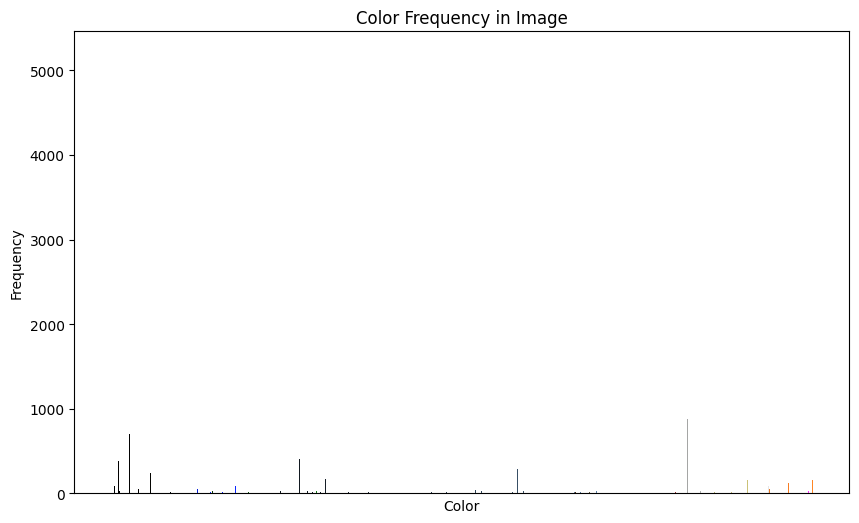

In [10]:
# Plot the frequency of each color
plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_colors[1:])), color_counts[1:], color=[tuple(color/255) for color in unique_colors[1:]])
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Color Frequency in Image')
plt.xticks([])
plt.show()